# Recommender Exercise Prompt

This exercise will warm you up and help understand better the coding part of `tf-idf`

- build a recommender system
- data: movie info (keywords, genre, title, synopsis, tagline, production companies, production countries, and more)

**Exercise Prompt Hints**:

- Key step: how to combine movie data into a single string?
- Recall: `TfidfVectorizer` expects one string per `document`
- Transform the strings using TF-IDF
- Your recommender system should work like this: Assume the query is always an existing movie in the database e.g. `query = "Scream 3", then recommend other movies based on this
- The next step would be to get the TF-IDF representation of "Scream 3"
- Once we have that compute similarity between "Scream 3" and all other vectors
- Sort by similarity and choose the closest matching movies
- Print out the top 5 closest movies
- Once you have the function that does this test it on several movies from different genres, and confirm to yourself that it works.

In [2]:
import pandas as pd
!wget https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv

--2024-12-24 00:02:11--  https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5698602 (5.4M) [text/csv]
Saving to: ‘tmdb_5000_movies.csv’

tmdb_5000_movies.cs 100%[===================>]   5.43M  5.70MB/s    in 1.0s    

2024-12-24 00:02:13 (5.70 MB/s) - ‘tmdb_5000_movies.csv’ saved [5698602/5698602]



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [3]:
df = pd.read_csv('tmdb_5000_movies.csv')
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [4]:
df['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [5]:
df['genres'][1]

'[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]'

In [6]:
df['keywords'][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [7]:
df['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [10]:
df['genres1'] = df['genres'].apply(json.loads)
df['genres1']

0       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
1       [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
3       [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
4       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
                              ...                        
4798    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
4799    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
4800    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4801                                                   []
4802                  [{'id': 99, 'name': 'Documentary'}]
Name: genres1, Length: 4803, dtype: object

In [13]:
df['genres2'] = df['genres1'].map(lambda x: ', '.join([val['name'] for val in x]))
df['genres2']

0       Action, Adventure, Fantasy, Science Fiction
1                        Adventure, Fantasy, Action
2                          Action, Adventure, Crime
3                    Action, Crime, Drama, Thriller
4                Action, Adventure, Science Fiction
                           ...                     
4798                        Action, Crime, Thriller
4799                                Comedy, Romance
4800               Comedy, Drama, Romance, TV Movie
4801                                               
4802                                    Documentary
Name: genres2, Length: 4803, dtype: object

In [16]:
df['keywords1'] = df['keywords'].map(lambda x: ', '.join([val['name'] for val in json.loads(x)]))
df['keywords1']

0       culture clash, future, space war, space colony...
1       ocean, drug abuse, exotic island, east india t...
2       spy, based on novel, secret agent, sequel, mi6...
3       dc comics, crime fighter, terrorist, secret id...
4       based on novel, mars, medallion, space travel,...
                              ...                        
4798    united states–mexico barrier, legs, arms, pape...
4799                                                     
4800    date, love at first sight, narration, investig...
4801                                                     
4802              obsession, camcorder, crush, dream girl
Name: keywords1, Length: 4803, dtype: object

In [17]:
df['production_companies1'] = df['production_companies'].map(lambda x: ', '.join([val['name'] for val in json.loads(x)]))
df['production_companies1']

0       Ingenious Film Partners, Twentieth Century Fox...
1       Walt Disney Pictures, Jerry Bruckheimer Films,...
2                          Columbia Pictures, Danjaq, B24
3       Legendary Pictures, Warner Bros., DC Entertain...
4                                    Walt Disney Pictures
                              ...                        
4798                                    Columbia Pictures
4799                                                     
4800    Front Street Pictures, Muse Entertainment Ente...
4801                                                     
4802           rusty bear entertainment, lucky crow films
Name: production_companies1, Length: 4803, dtype: object

In [18]:
df['production_countries1'] = df['production_countries'].map(lambda x: ', '.join([val['name'] for val in json.loads(x)]))
df['production_countries1']

0       United States of America, United Kingdom
1                       United States of America
2       United Kingdom, United States of America
3                       United States of America
4                       United States of America
                          ...                   
4798            Mexico, United States of America
4799                                            
4800                    United States of America
4801             United States of America, China
4802                    United States of America
Name: production_countries1, Length: 4803, dtype: object

In [19]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'genres1', 'genres2', 'keywords1',
       'production_companies1', 'production_countries1'],
      dtype='object')

In [22]:
df['doc'] = df[['title', 'tagline', 'overview', 'genres2', 'keywords1', 'production_companies1', 'production_countries1']].apply(lambda x: '; '.join(x.fillna('')), axis=1)

In [24]:
df['doc'][0]

'Avatar; Enter the World of Pandora.; In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.; Action, Adventure, Fantasy, Science Fiction; culture clash, future, space war, space colony, society, space travel, futuristic, romance, space, alien, tribe, alien planet, cgi, marine, soldier, battle, love affair, anti war, power relations, mind and soul, 3d; Ingenious Film Partners, Twentieth Century Fox Film Corporation, Dune Entertainment, Lightstorm Entertainment; United States of America, United Kingdom'

In [26]:
vectorizer = TfidfVectorizer()
tfidfs = vectorizer.fit_transform(df['doc'])

In [27]:
tfidfs

<4803x27198 sparse matrix of type '<class 'numpy.float64'>'
	with 323568 stored elements in Compressed Sparse Row format>

In [44]:
tfidfs.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Code Video

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [2]:
df = pd.read_csv('tmdb_5000_movies.csv')
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [3]:
x = df.iloc[0]
x

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [30]:
x['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [31]:
x['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [32]:
j = json.loads(x['genres'])
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [33]:
' '.join(''.join(jj['name'].split()) for jj in j)

'Action Adventure Fantasy ScienceFiction'

In [4]:
# convert the relevant data for each movie into a single string
# to be ingested by TfidfVectorizer
def genres_and_keywords_to_string(row):
    genres = json.loads(row['genres'])
    genres = ' '.join(''.join(j['name'].split()) for j in genres)
    keywords = json.loads(row['keywords'])
    keywords = ' '.join(''.join(j['name'].split()) for j in keywords)
    return f"{genres} {keywords}"


In [5]:
# create a new string representation of each movie
df['string'] = df.apply(genres_and_keywords_to_string, axis=1)

In [6]:
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,string
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action Adventure Fantasy ScienceFiction cultur...
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure Fantasy Action ocean drugabuse exoti...
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Action Adventure Crime spy basedonnovel secret...
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Action Crime Drama Thriller dccomics crimefigh...
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action Adventure ScienceFiction basedonnovel m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Action Crime Thriller unitedstates–mexicobarri...
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Comedy Romance
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",...,201

In [7]:
# create a tf-idf vectorizer object
tfidf = TfidfVectorizer(max_features=2000) # 'max_features' keeps the most frequent terms

In [8]:
# create a data martix from the strings (genres-keywords)
X = tfidf.fit_transform(df['string'])
X

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 37285 stored elements in Compressed Sparse Row format>

In [16]:
tfidf.vocabulary_

{'action': 11,
 'adventure': 23,
 'fantasy': 633,
 'sciencefiction': 1518,
 'cultureclash': 441,
 'future': 713,
 'spacecolony': 1636,
 'society': 1620,
 'spacetravel': 1643,
 'futuristic': 714,
 'romance': 1470,
 'space': 1634,
 'alien': 45,
 'tribe': 1830,
 'alienplanet': 49,
 'cgi': 312,
 'marine': 1057,
 'soldier': 1623,
 'battle': 170,
 'mindandsoul': 1113,
 '3d': 9,
 'ocean': 1225,
 'drugabuse': 534,
 'exoticisland': 602,
 'eastindiatradingcompany': 558,
 'loveofone': 1025,
 'slife': 1607,
 'traitor': 1815,
 'shipwreck': 1572,
 'strongwoman': 1695,
 'ship': 1571,
 'afterlife': 30,
 'fighter': 658,
 'pirate': 1300,
 'swashbuckler': 1737,
 'aftercreditsstinger': 29,
 'crime': 430,
 'spy': 1660,
 'basedonnovel': 159,
 'secretagent': 1532,
 'sequel': 1550,
 'britishsecretservice': 245,
 'drama': 526,
 'thriller': 1789,
 'dccomics': 462,
 'crimefighter': 431,
 'terrorist': 1776,
 'secretidentity': 1535,
 'burglar': 261,
 'hostagedrama': 852,
 'timebomb': 1793,
 'gothamcity': 753,
 'vi

In [17]:
# generate a mapping from movie title -> index (in df)
movie2idx = pd.Series(df.index, index=df['title'])
movie2idx

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [18]:
idx = movie2idx['Scream 3']
idx

1164

In [19]:
query = X[idx]
query

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [28]:
# print the query vector
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [29]:
query.toarray()[query.toarray() != 0]

array([0.36306702, 0.31890068, 0.40189445, 0.18013179, 0.37918186,
       0.20194301, 0.35285407, 0.3916815 , 0.33171951])

In [22]:
# compute similarity between query and every vector in X
scores = cosine_similarity(query, X)
scores

array([[0., 0., 0., ..., 0., 0., 0.]])

In [23]:
type(scores)

numpy.ndarray

In [24]:
# currently the array is 1 X N, make it just 1-D array
scores = scores.flatten()
scores

array([0., 0., 0., ..., 0., 0., 0.])

In [25]:
type(scores)

numpy.ndarray

In [26]:
len(scores)

4803

In [27]:
scores[scores != 0]

array([0.04226444, 0.1463315 , 0.04887916, 0.04710861, 0.04267651,
       0.04607834, 0.02726932, 0.0319531 , 0.04044373, 0.03851247,
       0.07360516, 0.03810969, 0.12522787, 0.02431527, 0.03099813,
       0.17100399, 0.08588779, 0.03824154, 0.07819659, 0.06217172,
       0.08792388, 0.03315365, 0.05192873, 0.05386907, 0.14521107,
       0.03732898, 0.09613283, 0.02525677, 0.04413863, 0.16847308,
       0.19248154, 0.05882324, 0.03239494, 0.08248716, 0.03277654,
       0.03968388, 0.04825209, 0.03492238, 0.0375854 , 0.02879218,
       0.0355589 , 0.08248262, 0.03314922, 0.11326461, 0.0446281 ,
       0.03938533, 0.05567122, 0.052452  , 0.02585227, 0.04917747,
       0.11253346, 0.07611479, 0.05158554, 0.06536506, 0.05324859,
       0.02978651, 0.03949087, 0.06649589, 0.06112   , 0.04076358,
       0.1458631 , 0.08995758, 0.17835931, 0.041735  , 0.0357359 ,
       0.05349061, 0.03962282, 0.02613514, 0.04653252, 0.07794115,
       0.05306879, 0.1471642 , 0.03479444, 0.02666718, 0.03172

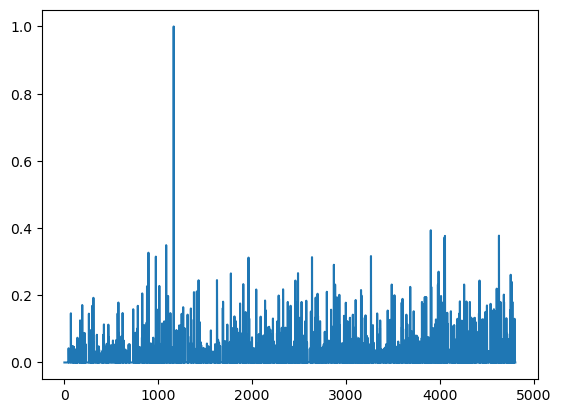

In [15]:
plt.plot(scores);

In [48]:
# top 10 matches
# exclude self (similarity between query and itself yields max score)
closest10_to_Scream3 = (-scores).argsort()[1:11]
closest10_to_Scream3

array([3902, 4628, 4053, 4048, 1084,  895, 3265,  974, 2637, 1961])

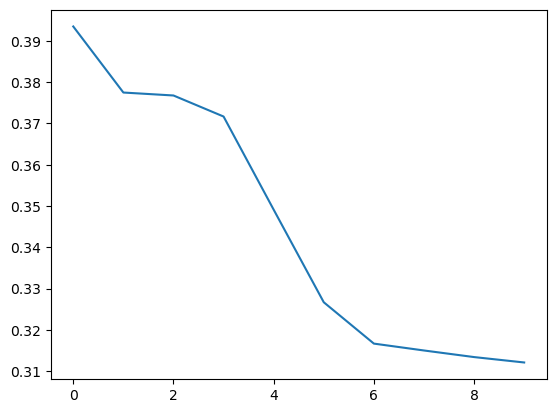

In [49]:
plt.plot(scores[closest10_to_Scream3])

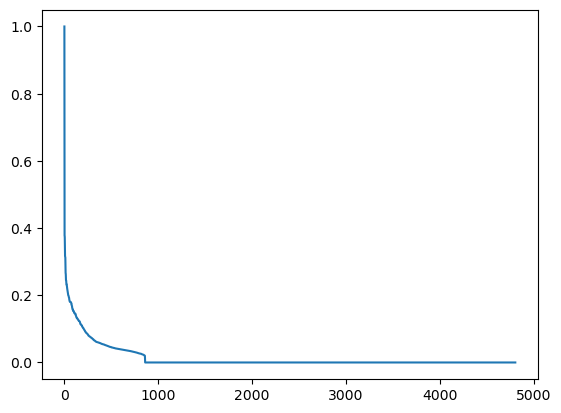

In [47]:
plt.plot(scores[(-scores).argsort()])

In [34]:
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,string
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 878, ""name"": ""Science Fiction""}]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""space war""}, {""id"": 3388, ""name"": ""space colony""}, {""id"": 3679, ""name"": ""society""}, {""id"": 3801, ""name"": ""space travel""}, {""id"": 9685, ""name"": ""futuristic""}, {""id"": 9840, ""name"": ""romance""}, {""id"": 9882, ""name"": ""space""}, {""id"": 9951, ""name"": ""alien""}, {""id"": 10148, ""name"": ""tribe""}, {""id"": 10158, ""name"": ""alien planet""}, {""id"": 10987, ""name"": ""cgi""}, {""id"": 11399, ""name"": ""marine""}, {""id"": 13065, ""name"": ""soldier""}, {""id"": 14643, ""name"": ""battle""}, {""id"": 14720, ""name"": ""love affair""}, {""id"": 165431, ""name"": ""anti war""}, {""id"": 193554, ""name"": ""power relations""}, {""id"": 206690, ""name"": ""mind and soul""}, {""id"": 209714, ""name"": ""3d""}]",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporation"", ""id"": 306}, {""name"": ""Dune Entertainment"", ""id"": 444}, {""name"": ""Lightstorm Entertainment"", ""id"": 574}]",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic island""}, {""id"": 1319, ""name"": ""east india trading company""}, {""id"": 2038, ""name"": ""love of one's life""}, {""id"": 2052, ""name"": ""traitor""}, {""id"": 2580, ""name"": ""shipwreck""}, {""id"": 2660, ""name"": ""strong woman""}, {""id"": 3799, ""name"": ""ship""}, {""id"": 5740, ""name"": ""alliance""}, {""id"": 5941, ""name"": ""calypso""}, {""id"": 6155, ""name"": ""afterlife""}, {""id"": 6211, ""name"": ""fighter""}, {""id"": 12988, ""name"": ""pirate""}, {""id"": 157186, ""name"": ""swashbuckler""}, {""id"": 179430, ""name"": ""aftercreditsstinger""}]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": 130}, {""name"": ""Second Mate Productions"", ""id"": 19936}]",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure Fantasy Action ocean drugabuse exoticisland eastindiatradingcompany loveofone'slife traitor shipwreck strongwoman ship alliance calypso afterlife fighter pirate swashbuckler aftercreditsstinger
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""name"": ""Crime""}]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"

In [37]:
df.iloc[idx, :]

budget                                                                                                                                                                                                                                                                                                         40000000
genres                                                                                                                                                                                                                                                  [{"id": 27, "name": "Horror"}, {"id": 9648, "name": "Mystery"}]
homepage                                                                                                                                                                                                                                                                                                            NaN
id                                                              

In [39]:
df.iloc[closest10_to_Scream3, :]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,string
1164,40000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""name"": ""Mystery""}]",NaN,4234,"[{""id"": 2546, ""name"": ""mask""}, {""id"": 2573, ""name"": ""metal detector""}, {""id"": 2793, ""name"": ""film director""}, {""id"": 8440, ""name"": ""ex-cop""}, {""id"": 12193, ""name"": ""reporter""}, {""id"": 12339, ""name"": ""slasher""}, {""id"": 13124, ""name"": ""scream""}, {""id"": 14676, ""name"": ""series of murders""}]",en,Scream 3,"A murdering spree begins to happen again, this time its targeted toward the original Woodsboro survivors and those associated with the movie inside a movie, 'Stab 3'. Sydney must face the demons of her past to stop the killer.",24.992057,"[{""name"": ""Konrad Pictures"", ""id"": 85}, {""name"": ""Craven-Maddalena Films"", ""id"": 1600}, {""name"": ""Dimension Films"", ""id"": 7405}]",...,2000-02-03,161834276,116.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Someone has taken their love of trilogies one step too far.,Scream 3,5.7,736,Horror Mystery mask metaldetector filmdirector ex-cop reporter slasher scream seriesofmurders
3902,3000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""name"": ""Mystery""}, {""id"": 53, ""name"": ""Thriller""}]",NaN,10225,"[{""id"": 952, ""name"": ""lightning""}, {""id"": 1227, ""name"": ""cemetery""}, {""id"": 2546, ""name"": ""mask""}, {""id"": 12339, ""name"": ""slasher""}, {""id"": 179422, ""name"": ""jason vorhees""}]",en,Friday the 13th Part VI: Jason Lives,"As a child, Tommy killed mass-murderer Jason. But now, years later, he is tormented by the fear that maybe Jason isn’t really dead. Determined to finish off the infamous killer once and for all, Tommy and a friend dig up Jason’s corpse in order to cremate him. Unfortunately, things go seriously awry, and Jason is instead resurrected, sparking a new chain of ruthlessly brutal murders. Now it’s up to Tommy to stop the dark, devious and demented deaths that he unwittingly brought about.",11.158167,"[{""name"": ""Paramount Pictures"", ""id"": 4}]",...,1986-08-01,19472057,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Kill or be killed!,Friday the 13th Part VI: Jason Lives,5.7,216,Horror Mystery Thriller lightning cemetery mask slasher jasonvorhees
4628,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,27420,"[{""id"": 12339, ""name"": ""slasher""}]",en,Graduation Day,"After a high school track runner, named Laura, suddenly dies from a heart attack after finishing a 30-second 200-meter race, a killer wearing a sweat suit and a fencing mask begins killing off her friends on the school track team one by one. The suspects include the track coach Michaels, Laura's sister Anne who arrives in town for the funeral, the creepy school principal Mr. Guglione, and Laura's strange boyfriend Kevin.",1.452199,[],...,1981-05-01,0,96.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some kids are dying to graduate...,Graduation Day,5.0,22,Horror slasher
4053,2200000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""name"": ""Thriller""}]",NaN,9731,"[{""id"": 2546, ""name"": ""mask""}, {""id"": 2800, ""name"": ""psychology""}, {""id"": 10714, ""name"": ""serial killer""}, {""id"": 11612, ""name"": ""hospital""}, {""id"": 13130, ""name"": ""teenager""}, {""id"": 14676, ""name"": ""series of murders""}]",en,Friday the 13th: A New Beginning,"Homicidal maniac Jason returns from the grave to cause more bloody mayhem. Young Tommy may have escaped from Crystal Lake, but he’s still haunted by the gruesome events that happened there. When gory murders start happening at the secluded halfway house for troubled teens where he now lives, it seems like his nightmarish nemesis, Jason, is back for more sadistic slaughters. But as things spiral out of control and the bod

## Check matrix movie

In [40]:
df[df['title'].str.contains('atrix')]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,string
123,150000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""name"": ""Action""}, {""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""name"": ""Science Fiction""}]",NaN,605,"[{""id"": 83, ""name"": ""saving the world""}, {""id"": 310, ""name"": ""artificial intelligence""}, {""id"": 312, ""name"": ""man vs machine""}, {""id"": 334, ""name"": ""flying""}, {""id"": 490, ""name"": ""philosophy""}, {""id"": 663, ""name"": ""fortune teller""}, {""id"": 780, ""name"": ""kung fu""}, {""id"": 1001, ""name"": ""underground world""}, {""id"": 1373, ""name"": ""killer robot""}, {""id"": 1530, ""name"": ""temple""}, {""id"": 1552, ""name"": ""subway""}, {""id"": 1566, ""name"": ""dream""}, {""id"": 1670, ""name"": ""sun""}, {""id"": 1701, ""name"": ""hero""}, {""id"": 1721, ""name"": ""fight""}, {""id"": 2725, ""name"": ""sunlight""}, {""id"": 2812, ""name"": ""computer virus""}, {""id"": 2849, ""name"": ""key""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3219, ""name"": ""precognition""}, {""id"": 3222, ""name"": ""super computer""}, {""id"": 3223, ""name"": ""machine town""}, {""id"": 3225, ""name"": ""ying yang""}, {""id"": 3737, ""name"": ""dying and death""}, {""id"": 4563, ""name"": ""virtual reality""}, {""id"": 4565, ""name"": ""dystopia""}, {""id"": 6104, ""name"": ""computer""}, {""id"": 6150, ""name"": ""faith""}, {""id"": 6193, ""name"": ""world religion""}, {""id"": 6256, ""name"": ""truth""}, {""id"": 10084, ""name"": ""rescue""}, {""id"": 10364, ""name"": ""mission""}, {""id"": 12190, ""name"": ""cyberpunk""}, {""id"": 187056, ""name"": ""woman director""}, {""id"": 220232, ""name"": ""yin yang""}, {""id"": 221385, ""name"": ""gnosticism""}]",en,The Matrix Revolutions,The human city of Zion defends itself against the massive invasion of the machines as Neo fights to end the war at another front while also opposing the rogue Agent Smith.,73.313918,"[{""name"": ""Village Roadshow Pictures"", ""id"": 79}, {""name"": ""NPV Entertainment"", ""id"": 172}, {""name"": ""Silver Pictures"", ""id"": 1885}, {""name"": ""Warner Bros."", ""id"": 6194}]",...,2003-11-05,424988211,129.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,Everything that has a beginning has an end.,The Matrix Revolutions,6.4,3096,Adventure Action Thriller ScienceFiction savingtheworld artificialintelligence manvsmachine flying philosophy fortuneteller kungfu undergroundworld killerrobot temple subway dream sun hero fight sunlight computervirus key future precognition supercomputer machinetown yingyang dyinganddeath virtualreality dystopia computer faith worldreligion truth rescue mission cyberpunk womandirector yinyang gnosticism
125,150000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""name"": ""Action""}, {""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""name"": ""Science Fiction""}]",NaN,604,"[{""id"": 83, ""name"": ""saving the world""}, {""id"": 310, ""name"": ""artificial intelligence""}, {""id"": 312, ""name"": ""man vs machine""}, {""id"": 779, ""name"": ""martial arts""}, {""id"": 780, ""name"": ""kung fu""}, {""id"": 1001, ""name"": ""underground world""}, {""id"": 1566, ""name"": ""dream""}, {""id"": 1701, ""name"": ""hero""}, {""id"": 1721, ""name"": ""fight""}, {""id"": 2812, ""name"": ""computer virus""}, {""id"": 2849, ""name"": ""key""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3217, ""name"": ""plato""}, {""id"": 3219, ""name"": ""precognition""}, {""id"": 3221, ""name"": ""rave""}, {""id"": 3737, ""name"": ""dying and death""}, {""id"": 4563, ""name"": ""virtual reality""}, {""id"": 4565, ""name"": ""dystopia""}, {""id"": 6104, ""name"": ""computer""}, {""id"": 6150, ""name"": ""faith""}, {""id"": 6193, ""name"": ""world religion""}, 

In [42]:
idx_matrix = movie2idx["The Matrix"]
idx_matrix

634

In [43]:
query_matrix = X[idx_matrix]
query_matrix

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [44]:
scores_matrix = cosine_similarity(query_matrix, X)
scores_matrix

array([[0.02270417, 0.00871929, 0.01722133, ..., 0.        , 0.        ,
        0.        ]])

In [45]:
scores_matrix = scores_matrix.flatten()

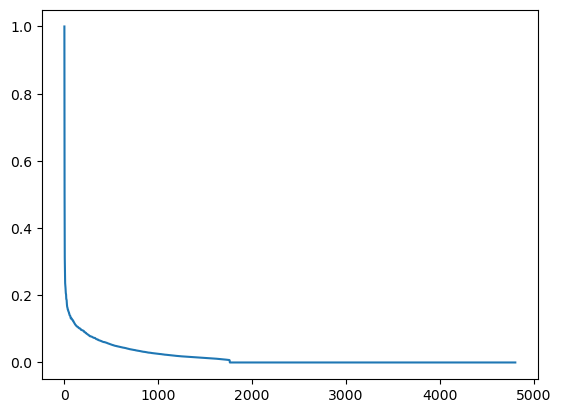

In [51]:
plt.plot(scores_matrix[(-scores_matrix).argsort()])

In [52]:
# get top 5 matches
# exclude self
recommend_idx = (-scores_matrix).argsort()[1:6]
recommend_idx

array([ 125,  123, 2484,   93, 1725])

In [56]:
# convert indices back to titles
df['title'].iloc[recommend_idx]

125                    The Matrix Reloaded
123                 The Matrix Revolutions
2484                  The Thirteenth Floor
93      Terminator 3: Rise of the Machines
1725                          Blade Runner
Name: title, dtype: object

In [57]:
# create a function that generates recommendations
def recommend(title):
    # get the row in the dataframe for this movie
    idx = movie2idx[title]
    if type(idx) == pd.Series:
        idx = idx.iloc[0]
    
    # calculate the pairwise similarities for this movie
    query = X[idx]
    scores = cosine_similarity(query, X)
    
    # currently the array is 1 x N, make it just a 1-D array
    scores = scores.flatten()
    
    # get the indexes of the highest scoring movies
    # get the first K recommendations
    # don't return itself
    recommend_idx = (-scores).argsort()[1:6]
    
    # return the titles of the recommendations
    return df['title'].iloc[recommend_idx]

In [58]:
print(f"Recommendations for Scream 3: \n{recommend('Scream 3')}")

Recommendations for Scream 3: 
3902    Friday the 13th Part VI: Jason Lives
4628                          Graduation Day
4053        Friday the 13th: A New Beginning
4048                             The Calling
1084                         The Glimmer Man
Name: title, dtype: object


In [59]:
print(f"Recommendations for The Matrix: \n{recommend('The Matrix')}")

Recommendations for The Matrix: 
125                    The Matrix Reloaded
123                 The Matrix Revolutions
2484                  The Thirteenth Floor
93      Terminator 3: Rise of the Machines
1725                          Blade Runner
Name: title, dtype: object
